### Dictionary of data

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

age = age in years 

sex = (1 = male; 0 = female) 

cp = chest pain type 

trestbps= resting blood pressure (in mm Hg on admission to the hospital) 

chol = serum cholestoral in mg/dl

fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg = resting electrocardiographic results

thalach = maximum heart rate achieved

exang = exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope = the slope of the peak exercise ST segment

ca = number of major vessels (0-3) colored by flourosopy

thal 3 = normal; 6 = fixed defect; 7 = reversable defect

target = 1 or 0

In [154]:
import pandas as pd

# charts
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [155]:
url = 'https://raw.githubusercontent.com/caiohenrique12/pos-data-science/master/datasets/Heart%20Disease%20Dataset.csv'
df = pd.read_csv(url)

In [156]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Checking type of columns and null values

In [157]:
def info_null_values(df):
  info = pd.DataFrame(df.dtypes).T.rename(index={0: 'type'})
  info = info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0: 'Null'}))
  info = info.append(pd.DataFrame(df.isnull().sum()/len(df) * 100).T.rename(index={0: 'Null(%)'}))
  return info

### Without null values

In [158]:
info_null_values(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
type,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64
Null,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Null(%),0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Start with EDA

#### Our dataset have more males comparing with womans

[Text(0, 0, 'F'), Text(0, 0, 'M')]

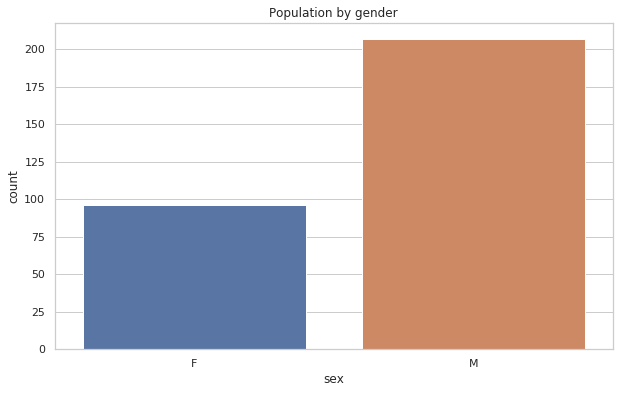

In [159]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='sex', data=df)
ax.set_title("Population by gender")
ax.set_xticklabels(['F', 'M'])

#### Most males have more blood sugar comparing with womans when staying in fasting

[Text(0, 0, 'F'), Text(0, 0, 'M')]

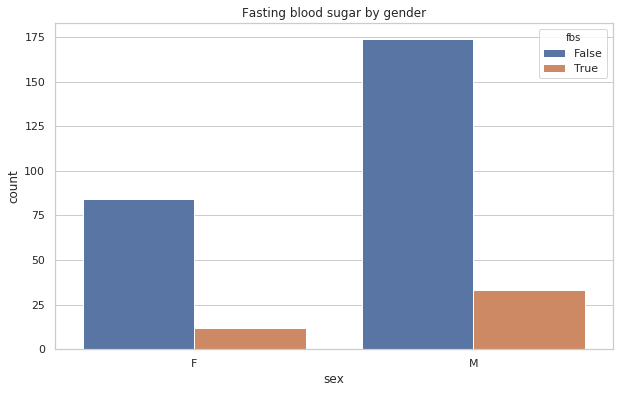

In [160]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='sex', hue='fbs', data=df, hue_order = [False, True])
ax.set_title("Fasting blood sugar by gender")
ax.set_xticklabels(['F', 'M'])

#### Distribution age

Text(0.5, 1.0, 'Distribution of age')

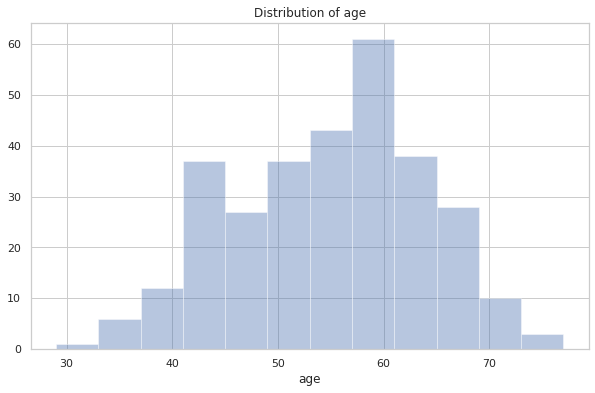

In [161]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.distplot(df['age'], kde=False);
ax.set_title("Distribution of age")

[Text(0, 0, 'F'), Text(0, 0, 'M')]

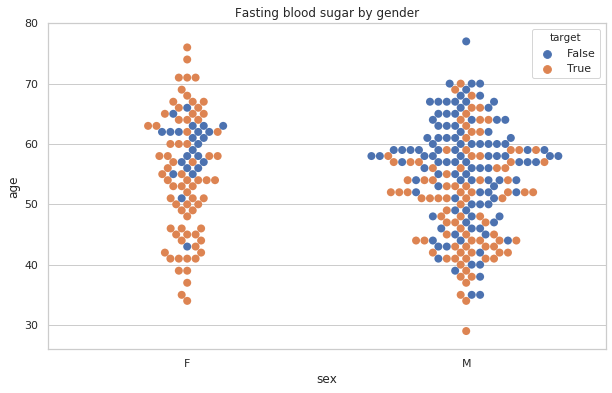

In [162]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.swarmplot(x="sex", y="age", data=df, size=8,
                   hue='target', hue_order= [False, True])

ax.set_title("Fasting blood sugar by gender")
ax.set_xticklabels(['F', 'M'])

#### M: Concentration between 48 to 60 years
#### F: Concentration between 50 to 63 years 

[Text(0, 0, 'F'), Text(0, 0, 'M')]

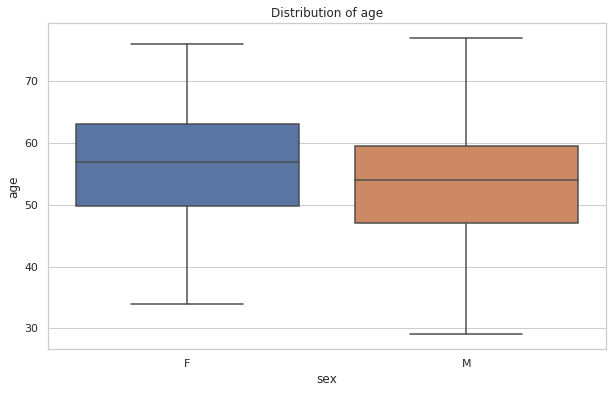

In [163]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x='sex', y='age', data=df)
ax.set_title("Distribution of age")
ax.set_xticklabels(['F', 'M'])

Text(0.5, 1.0, 'Distribution of Serum cholestoral')

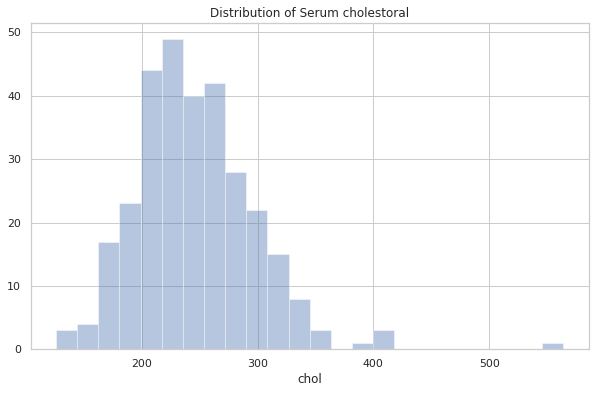

In [164]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.distplot(df['chol'], kde = False);
ax.set_title("Distribution of Serum cholestoral")

Text(0.5, 1.0, 'Distribution of Resting blood pressure')

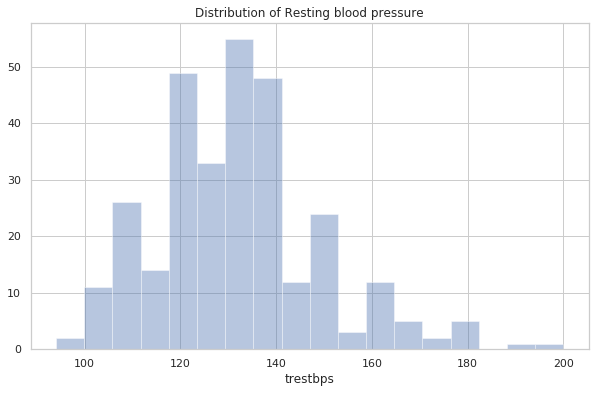

In [224]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.distplot(df['trestbps'], kde= False)
ax.set_title("Distribution of Resting blood pressure")

In [225]:
# ml libs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### Preprocessing

In [226]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Starting ML

In [227]:
data = df.copy()

In [228]:
X = data.drop(['target'], axis=1).values
y = data.target.values
RANDOM_STATE = 16

In [229]:
one_hot = OneHotEncoder()

random_clf = RandomForestClassifier()
decision_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier()
mlp_clf = MLPClassifier()

In [230]:
def pipeline_init(estimator):
  simple_imputer = SimpleImputer()
  pipe = Pipeline(steps=[('imputer', simple_imputer),
                         ('estimator', estimator)])
  return pipe

In [231]:
def run_cros_val_score(estimator, X, y, scoring, cv):
  return cross_val_score(random_pipe, X_test, y_test, scoring=scoring, cv=cv)

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [240]:
random_pipe = pipeline_init(random_clf)
random_pipe.fit(X_train, y_train)
y_pred = random_pipe.predict(X_test)
cross_val = run_cros_val_score(random_pipe, X_test, y_test, 'f1_weighted', 5)

print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred))
print(f'CROSS VAL SCORE {cross_val.mean()}')

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        49
           1       0.80      0.86      0.83        42

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91

CROSS VAL SCORE 0.810533642484107


In [241]:
decision_pipe = pipeline_init(decision_clf)
decision_pipe.fit(X_train, y_train)
y_pred_dct = decision_pipe.predict(X_test)
cross_val = run_cros_val_score(decision_pipe, X_test, y_test, 'f1_weighted', 5)

print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred_dct))
print(f'CROSS VAL SCORE {cross_val.mean()}')

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.83      0.69      0.76        49
           1       0.70      0.83      0.76        42

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91

CROSS VAL SCORE 0.7873672393325106


In [242]:
knn_pipe = pipeline_init(knn_clf)
knn_pipe.fit(X_train, y_train)
y_pred_knn = decision_pipe.predict(X_test)
cross_val = run_cros_val_score(knn_pipe, X_test, y_test, 'f1_weighted', 5)

print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred_knn))
print(f'CROSS VAL SCORE: {cross_val.mean()}')

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.83      0.69      0.76        49
           1       0.70      0.83      0.76        42

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91

CROSS VAL SCORE: 0.7242972255356157


In [236]:
mlp_pipe = pipeline_init(mlp_clf)
mlp_pipe.fit(X_train, y_train)
y_pred_mlp = mlp_pipe.predict(X_test)
cross_val = run_cros_val_score(mlp_pipe, X_test, y_test, 'f1_weighted', 5)

print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred_mlp))
print(f'CROSS VAL SCORE: {cross_val.mean()}')

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.76      0.83        49
           1       0.76      0.93      0.84        42

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.84      0.83        91

CROSS VAL SCORE: 0.7553837803063809


### Tuning Random Forest

In [255]:
parameters = {'estimator__min_samples_leaf': [3,5,7,10,100],
              'estimator__min_samples_split': [3,5,7,10,100],
              'estimator__n_estimators': [10,100, 1000],
              'estimator__max_depth': [6,10,15,20,None],
              'estimator__random_state': [RANDOM_STATE]}

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
gridsearch = GridSearchCV(random_pipe, parameters, scoring='f1', cv=sss)
gridsearch.fit(X_train, y_train)
y_pred = gridsearch.predict(X_test)

In [256]:
print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred))
print('CROSS VAL SCORE')
run_cros_val_score(gridsearch, X_test, y_test, 'f1_weighted', 5).mean()

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        49
           1       0.81      0.93      0.87        42

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.88      0.87      0.87        91

CROSS VAL SCORE


0.7674008550788736